<a href="https://colab.research.google.com/github/AilingLiu/Time-Series-Python/blob/main/3_Autoregressive_(AR)_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests, zipfile, io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

r = requests.get('https://github.com/AilingLiu/Time-Series-Python/raw/main/data.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# data files available
z.namelist()
     

['data/',
 'data/.DS_Store',
 '__MACOSX/',
 '__MACOSX/data/',
 '__MACOSX/data/._.DS_Store',
 'data/AMZN.csv',
 '__MACOSX/data/._AMZN.csv',
 'data/CME_HO1.csv',
 '__MACOSX/data/._CME_HO1.csv',
 'data/CME_NG1.csv',
 '__MACOSX/data/._CME_NG1.csv',
 'data/DJI.csv',
 '__MACOSX/data/._DJI.csv',
 'data/HRB.csv',
 '__MACOSX/data/._HRB.csv',
 'data/MSFT.csv',
 '__MACOSX/data/._MSFT.csv',
 'data/Sprint_Intraday.txt',
 '__MACOSX/data/._Sprint_Intraday.txt']

# AR Model

- mathmatical description of AR(1) model

$R_t = \mu + Φ R_{t-1} + ϵ_t$
- since only one lagged value on right hand side, this is called:
  - AR model of order 1, or
  - AR(1) model
- AR parameter is $ϕ$
- For stationarity, $-1 < \phi < 1$

Interpretation of AR(1) parameter

$R_t = \mu + Φ R_{t-1} + ϵ_t$
- Negative ϕ: mean Reversion (large increase, large decrease)
- Positive ϕ: Momentum 

Higher Order AR Models:
- AR(1)
$R_t = \mu + Φ_1 R_{t-1} + ϵ_t$

- AR(2)
$R_t = \mu + Φ_1 R_{t-1} + Φ_2 R_{t-2} + ϵ_t$

- AR(3)
$R_t = \mu + Φ_1 R_{t-1} + Φ_2 R_{t-2} + Φ_3 R_{t-3} + ϵ_t$

- ...


There are a few conventions when using the `arima_process` module in statsmodels that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is **opposite** what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with ϕ=0.9, the array representing the AR parameters would be `ar = np.array([1, -0.9])`

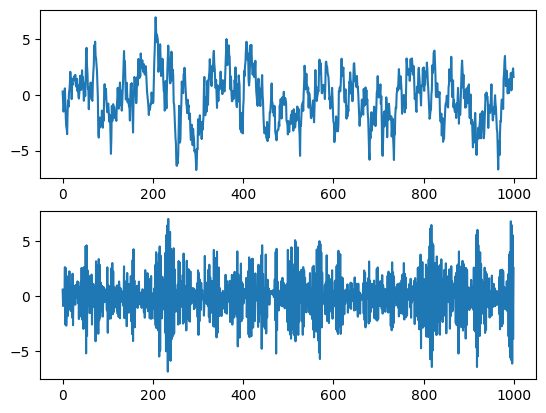

In [2]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

The two AR parameters produce very different looking time series plots, but in the next exercise you'll really be able to distinguish the time series.

## Compare the ACF for Several AR Time Series

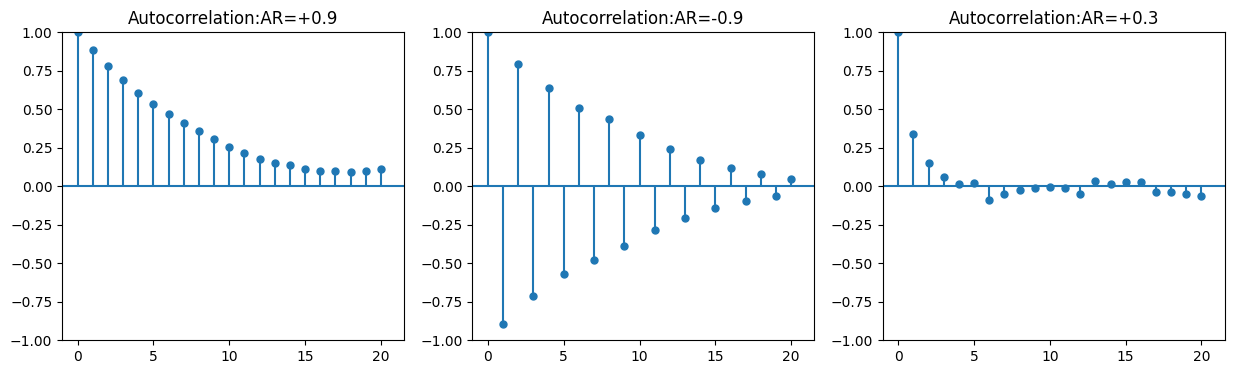

In [12]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20, ax=ax1)
ax1.set_title('Autocorrelation:AR=+0.9')

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20, ax=ax2)
ax2.set_title('Autocorrelation:AR=-0.9')

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20, ax=ax3)
ax3.set_title('Autocorrelation:AR=+0.3')

plt.show()

The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, ϕ=+0.9, the first-lag autocorrelation will be 0.9, the second-lag will be $(0.9)^2=0.81$
, the third-lag will be $(0.9)^3=0.729$, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be $(-0.9)^2=0.81$, the third-lag will be $(-0.9)^3=-0.729$, etc.

# Estimate an AR Model using ARIMA

You will estimate the AR(1) parameter, ϕ, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For `simulated_data_1` with a true ϕ of 0.9, you will print out the estimate of 
ϕ. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

In [14]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1455.531
Date:                Thu, 18 May 2023   AIC                           2917.062
Time:                        15:10:59   BIC                           2931.785
Sample:                             0   HQIC                          2922.657
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2388      0.281     -0.850      0.395      -0.789       0.312
ar.L1          0.8830      0.015     60.830      0.000       0.855       0.911
sigma2         1.0743      0.052     20.850      0.0

The `ar.L1` is the estimated ϕ, notice how close it is to the simulated data with ϕ =+0.9.

# forcasting with an AR Model

In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. You can plot the forecasted data using the function `plot_predict()`. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated data in DataFrame `simulated_data_1`, with ϕ=0.9, you will plot out-of-sample forecasts and confidence intervals around those forecasts.

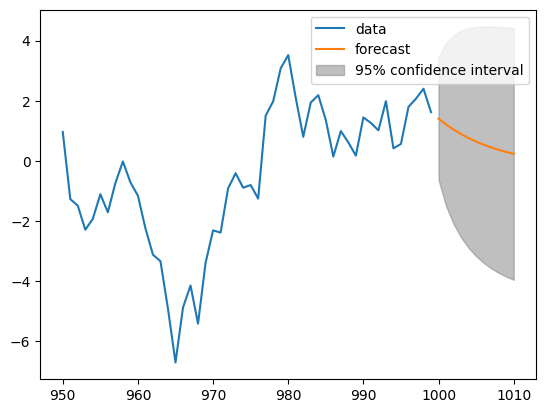

In [18]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first AR(1) model
simulated_data_1 = pd.DataFrame(simulated_data_1, columns=['data'])
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean. 

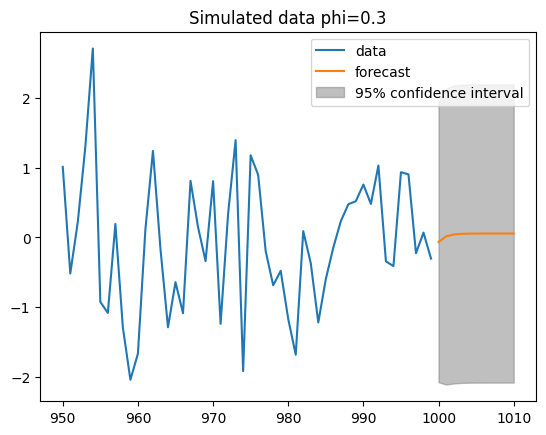

In [19]:
# Forecast the first AR(1) model
simulated_data_3 = pd.DataFrame(simulated_data_3, columns=['data'])
mod = ARIMA(simulated_data_3, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_3.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
ax.set_title('Simulated data phi=0.3')
plt.show()

# Forecast Interest Rates

In [30]:

CME=pd.read_csv('data/CME_HO1.csv', sep=',' 
                 , index_col='Date'
                 )
CME.index = pd.to_datetime(CME.index)
CME = CME.sort_index()
CME = CME.resample(rule='M').last()
CME.head()

,Close
Date,
1991-01-31,0.7125
1991-02-28,0.6536
1991-03-31,0.5689
1991-04-30,0.5357
1991-05-31,0.5648


In [32]:
CME.tail()

,Close
Date,
2005-08-31,2.0530
2005-09-30,2.0673
2005-10-31,1.7698
2005-11-30,1.6165
2005-12-31,1.7280


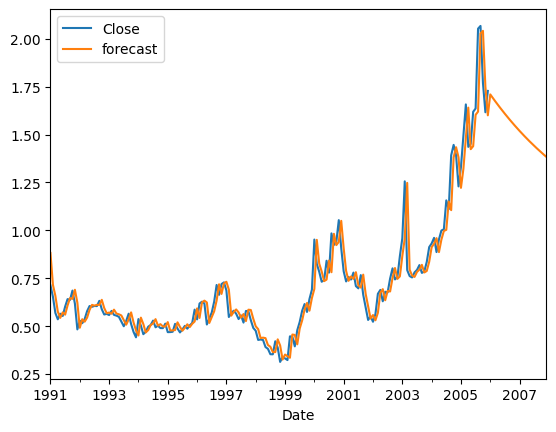

In [35]:
# Forecast interst rates using an AR(1) model
mod = ARIMA(CME, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
CME.plot(ax=ax)
plot_predict(res, start=0, end='2007-12-31', alpha=None, ax=ax)
plt.show()

According to an AR(1) model, 180 months close value are forecasted to decrease from 1.7, towards the end of 2007 to 1.3 in 12 months.

In [39]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  180
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 179.925
Date:                Thu, 18 May 2023   AIC                           -353.849
Time:                        15:41:34   BIC                           -344.270
Sample:                    01-31-1991   HQIC                          -349.965
                         - 12-31-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8820      0.353      2.501      0.012       0.191       1.573
ar.L1          0.9784      0.015     65.510      0.000       0.949       1.008
sigma2         0.0078      0.000     20.535      0.0

# Choosing the right model

- The order of an AR(p) model will usually be unknown
- Two techniques to determine order
  - partial autocorrelated function
  - information criteria

Partial Autocorrelation Function (PACF)

- AR(1)
$R_t = \phi_{0,1}+ \phi_{1,1}R_{t-1} + ϵ_{1t}$

- AR(2)
$R_t = \phi_{0,2} + \phi_{1,2}R_{t-1} + \phi_{2,2} R_{t-2} + ϵ_{2t}$

- AR(3)
$R_t = \phi_{0,3} + \phi_{1,3}R_{t-1} + \phi_{2,3} R_{t-2} + \phi_{3,3} R_{t-3} + ϵ_{3t}$

- AR(4)
$R_t = \phi_{0,4} + \phi_{1,4}R_{t-1} + \phi_{2,4} R_{t-2} + \phi_{3,3} R_{t-3} +\phi_{4,4} R_{t-4} + ϵ_{4t}$

.
.
.


Estimate Order of Model: PACF
One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and c

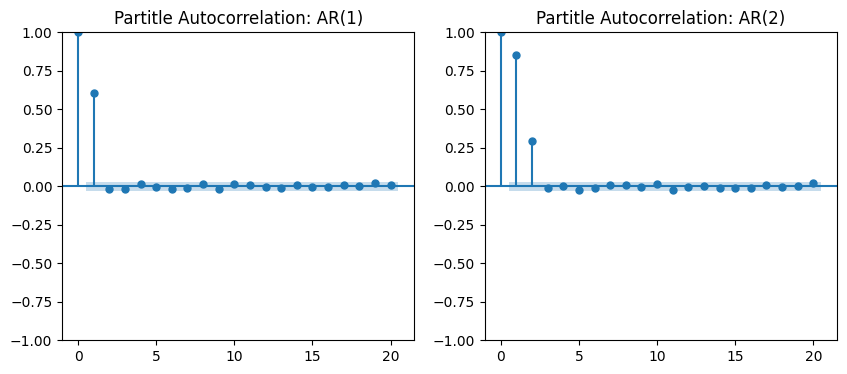

In [46]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20, ax=ax1, method='ywm')
ax1.set_title('Partitle Autocorrelation: AR(1)')


# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20, ax=ax2, method='ywm')
ax2.set_title('Partitle Autocorrelation: AR(2)')

plt.show()

Notice that the number of significant lags for the PACF indicate the order of the AR model.

# Estimate Order of Model: Information Criteria

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model.

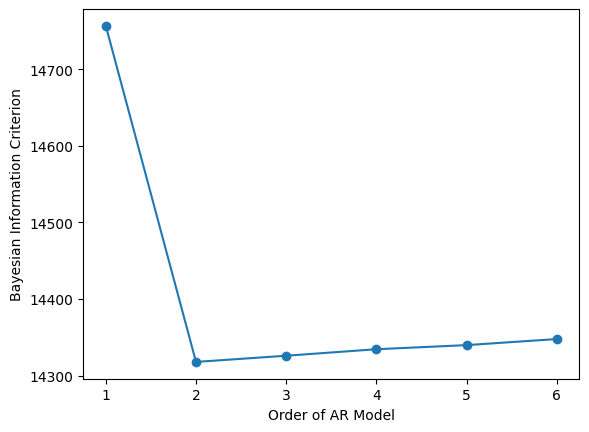

In [48]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
# for the plot, skip p=0 and plot for p=1,…6
plt.plot(range(1,7), BIC[1:7], marker='o') 
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.